In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [54]:
data=pd.read_csv('creditcard.csv', delim_whitespace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [55]:
df_index = df.index
df_index

RangeIndex(start=0, stop=284807, step=1)

In [57]:
df_col = df.columns
df_col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [58]:
df_index.values

array([     0,      1,      2, ..., 284804, 284805, 284806])

In [59]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,0.927124,0.118914
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,3.495006,0.557903
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-0.307413,-0.994983
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.229162,-0.358210
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.770838,0.641790
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,358.683155,1.035022


In [60]:
df['Class'].idxmax()

541

In [61]:
df.loc[(df['scaled_amount'] > 10) & (df.Class == 0)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,0,19.296444,-0.994561
89,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,0,15.650388,-0.994290
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,0,12.542444,-0.993961
150,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,...,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,0,12.795221,-0.993891
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,0,53.182981,-0.993773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284290,0.311762,-2.602832,-2.942923,1.880832,-0.090804,-0.480139,1.865720,-0.549267,-0.303862,0.069705,...,0.220383,-0.913711,-0.332605,0.278026,-0.474820,-0.200782,0.073386,0,12.226647,1.029300
284383,-0.065120,-4.114668,-2.106854,-0.137339,-1.384530,0.239999,0.893833,-0.257922,1.145888,-0.785883,...,-1.244969,-0.686403,-0.963878,-0.924685,0.210599,-0.253408,0.125687,0,15.258856,1.030381
284497,-0.801222,-4.874934,-3.195666,1.177224,-1.299393,-0.397073,2.192428,-0.603173,0.358854,-0.611675,...,-1.011155,-1.160277,-0.266300,-0.523929,-0.233779,-0.338745,0.180252,0,20.438203,1.031568
284528,0.643223,-3.380753,-3.890511,-0.386292,-0.266371,-0.822619,1.514705,-0.729189,-0.901784,0.565653,...,0.691763,-1.051281,0.140447,0.508555,0.220468,-0.278604,0.058006,0,12.268567,1.031908


In [62]:
df.loc[(df['scaled_amount'] > 10) & (df['scaled_amount'] < 150)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,0,19.296444,-0.994561
89,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,0,15.650388,-0.994290
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,0,12.542444,-0.993961
150,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,...,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,0,12.795221,-0.993891
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,0,53.182981,-0.993773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284290,0.311762,-2.602832,-2.942923,1.880832,-0.090804,-0.480139,1.865720,-0.549267,-0.303862,0.069705,...,0.220383,-0.913711,-0.332605,0.278026,-0.474820,-0.200782,0.073386,0,12.226647,1.029300
284383,-0.065120,-4.114668,-2.106854,-0.137339,-1.384530,0.239999,0.893833,-0.257922,1.145888,-0.785883,...,-1.244969,-0.686403,-0.963878,-0.924685,0.210599,-0.253408,0.125687,0,15.258856,1.030381
284497,-0.801222,-4.874934,-3.195666,1.177224,-1.299393,-0.397073,2.192428,-0.603173,0.358854,-0.611675,...,-1.011155,-1.160277,-0.266300,-0.523929,-0.233779,-0.338745,0.180252,0,20.438203,1.031568
284528,0.643223,-3.380753,-3.890511,-0.386292,-0.266371,-0.822619,1.514705,-0.729189,-0.901784,0.565653,...,0.691763,-1.051281,0.140447,0.508555,0.220468,-0.278604,0.058006,0,12.268567,1.031908


In [63]:
df.loc[(df['scaled_amount'] > 10) & (df.Class == 1)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
6971,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,...,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1,24.979809,-0.888497
10630,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,-11.786812,...,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,1,10.401174,-0.785418
10690,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1,16.724516,-0.782481
39183,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,1,10.547474,-0.528237
44001,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,...,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,1,10.906449,-0.504576
81609,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,...,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1,19.109341,-0.301707
89190,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,-3.990551,...,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1,19.285405,-0.261105
95597,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,...,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1,18.615944,-0.226824
107637,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,-5.032028,...,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,1,11.218193,-0.166308
146790,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,2.891399,5.802537,-1.933197,-1.017717,1.987862,...,-0.053812,0.580106,0.216927,0.151643,-0.332115,-0.469800,-1.495006,1,11.282191,0.037489


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print("Variables of class feature:", df.Class.count())
print("Total number of datapoints:", df.shape[0])
print("Total number of features:", df.shape[1])

Variables of class feature: 284807
Total number of datapoints: 284807
Total number of features: 31


In [9]:
print("Non-fraud datapoints:", df.Class.value_counts()[0])
print("Fraud datapoints:", df.Class.value_counts()[1])

Non-fraud datapoints: 284315
Fraud datapoints: 492


In [10]:
print('% of non-fraud datapoints: {:.2f}%.'.format((df.Class.value_counts()/df.Class.count())[0]*100))
print('% of fraud datapoints: {:.2f}%.'.format((df.Class.value_counts()/df.Class.count())[1]*100))

% of non-fraud datapoints: 99.83%.
% of fraud datapoints: 0.17%.


Text(0.5, 1.0, 'Target Variable Distribution')

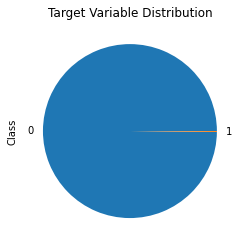

In [11]:
target= df.Class.value_counts()
fig = target.plot(kind='pie')
fig.set_title("Target Variable Distribution")

In [12]:
scaler = RobustScaler()
scaled_time = scaler.fit_transform(df[['Time']])


In [13]:
l = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(l)

In [14]:
scaled_amnt = scaler.fit_transform(df[['Amount']])
l = [item for sublist in scaled_amnt.tolist() for item in sublist]
scaled_amnt = pd.Series(l)

In [15]:
df = pd.concat([df, scaled_amnt.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [16]:
df.to_csv('creditcard-scaleddata.csv',index=False)

Text(0.5, 1.0, 'Time Variable Distribution')

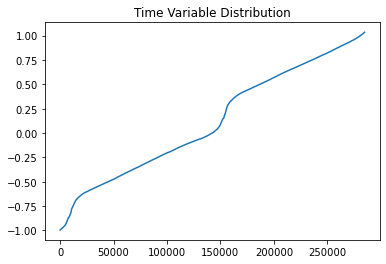

In [17]:
fig = df['scaled_time'].plot()
fig.set_title("Time Variable Distribution")

Text(0.5, 1.0, 'Amount Variable Distribution')

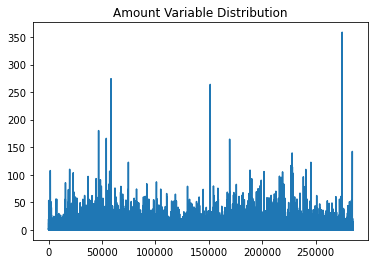

In [18]:
fig = df['scaled_amount'].plot()
fig.set_title("Amount Variable Distribution")

Text(0.5, 1.0, 'Heatmap of Correlation')

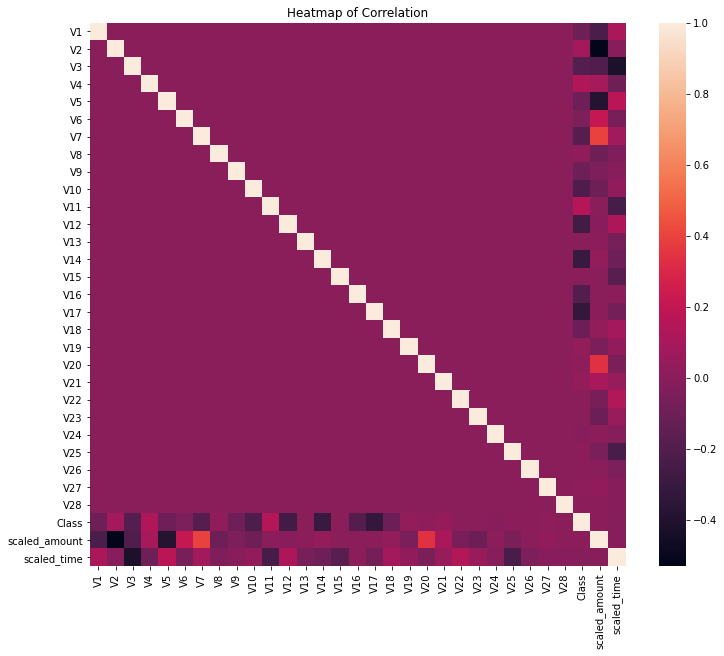

In [19]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [20]:
X = df.drop('Class',axis=1)
y = df['Class']

In [21]:
training_features, test_features, training_target, test_target \
= train_test_split(X, y, test_size=0.20, random_state=30)

In [22]:
print("Size of training features:", training_features.shape)
print("Size of training target:", training_target.shape)
print("Size of test features:", test_features.shape)
print("Size of test target:", test_target.shape)

Size of training features: (227845, 30)
Size of training target: (227845,)
Size of test features: (56962, 30)
Size of test target: (56962,)


In [23]:
from imblearn.under_sampling import RandomUnderSampler


In [24]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,test_size = .10, random_state=12)



In [25]:
rus = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train)

In [41]:
print("pre-rand. Sampling")
print("training features:", x_train.shape)
print("training target:", y_train.shape)

print("post-rand. Sampling")
print("training features:", x_train_res.shape)
print("training target:", y_train_res.shape)

pre-rand. Sampling
training features: (205060, 30)
training target: (205060,)
post-rand. Sampling
training features: (670, 30)
training target: (670,)


In [27]:
(unique, counts) = np.unique(y_train_res, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Num. fraud datapoints:", frequencies[1][1])
print("Num. non-fraud datapoints:", frequencies[0][1])


Num. fraud datapoints: 335
Num. non-fraud datapoints: 335


/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


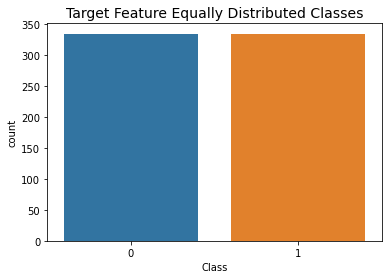

In [28]:
ytrainDF = pd.DataFrame(y_train_res)
sns.countplot('Class', data=ytrainDF)
plt.title('Target Feature Equally Distributed Classes', fontsize=14)
plt.show()

In [29]:
model_params = {
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': list(range(2,4,1)), 
            'min_samples_leaf': list(range(5,7,1))
        }
    },
    'svc' : {
        'model': svm.SVC(),
        'params': {
            'C': [0.5, 0.7, 0.9, 1], 
            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(2,5,1)), 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'], 
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    }
}


In [30]:
scores = []
estimators = {}

for algo, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_res, y_train_res)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    estimators[algo] = clf.best_estimator_
    
dfModels = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifi

/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifi

In [31]:
dfModels

,model,best_score,best_params
0,decision_tree,0.923881,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
1,svc,0.934328,"{'C': 1, 'kernel': 'rbf'}"
2,knn,0.940299,"{'algorithm': 'auto', 'n_neighbors': 3}"
3,logistic_regression,0.935821,"{'C': 0.1, 'penalty': 'l2'}"
4,random_forest,0.944776,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."


In [32]:
estimators

{'decision_tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=5),
 'svc': SVC(C=1),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'logistic_regression': LogisticRegression(C=0.1),
 'random_forest': RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)}

In [33]:
estimators['logistic_regression']

LogisticRegression(C=0.1)

In [34]:
descisionTree = estimators['decision_tree']
descisionTree_Train = descisionTree.fit(x_train_res, y_train_res)
descisionTree_predTrain= descisionTree_Train.predict(x_train_res)
print("Data Training")
print(classification_report(y_train_res, descisionTree_predTrain))
print("Model accuracy:", round(accuracy_score(y_train_res, descisionTree_predTrain)*100,2), "%")

descisionTree_Val = descisionTree.fit(x_val, y_val)
descisionTree_predVal = descisionTree_Val.predict(x_val)
print("\nValidation Data")
print(classification_report(y_val, descisionTree_predVal))
print("Model accuracy:", round(accuracy_score(y_val, descisionTree_predVal)*100,2), "%")

Training Data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       335
           1       0.99      0.91      0.95       335

    accuracy                           0.95       670
   macro avg       0.95      0.95      0.95       670
weighted avg       0.95      0.95      0.95       670

Model accuracy: 94.78 %


Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       0.92      0.76      0.83        45

    accuracy                           1.00     22785
   macro avg       0.96      0.88      0.91     22785
weighted avg       1.00      1.00      1.00     22785

Model accuracy: 99.94 %


In [35]:
SVC = estimators['svc']
SVC_Train = SVC.fit(x_train_res, y_train_res)
SVC_predTrain= SVC_Train.predict(x_train_res)
print("Training Data")
print(classification_report(y_train_res, SVC_predTrain))
print("Model accuracy:", round(accuracy_score(y_train_res, SVC_predTrain)*100,2), "%")


SVC_Val = SVC.fit(x_val, y_val)
SVC_predVal = SVC_Val.predict(x_val)
print("\nValidation Data")
print(classification_report(y_val, SVC_predVal))
print("Model accuracy:", round(accuracy_score(y_val, SVC_predVal)*100,2), "%")

Training Data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       335
           1       0.99      0.90      0.94       335

    accuracy                           0.95       670
   macro avg       0.95      0.95      0.95       670
weighted avg       0.95      0.95      0.95       670

Model accuracy: 94.63 %


Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       1.00      0.82      0.90        45

    accuracy                           1.00     22785
   macro avg       1.00      0.91      0.95     22785
weighted avg       1.00      1.00      1.00     22785

Model accuracy: 99.96 %


In [36]:
KNN = estimators['knn']
KNN_Train = KNN.fit(x_train_res, y_train_res)
KNN_predTrain= KNN_Train.predict(x_train_res)
print("Training Data")
print(classification_report(y_train_res, KNN_predTrain))
print("Model accuracy:", round(accuracy_score(y_train_res, KNN_predTrain)*100,2), "%")

KNN_Val = KNN.fit(x_val, y_val)
KNN_predVal = KNN_Val.predict(x_val)
print("Validation Data")
print(classification_report(y_val, KNN_predVal))
print("Model accuracy:", round(accuracy_score(y_val, KNN_predVal)*100,2), "%")

Training Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       335
           1       0.98      0.96      0.97       335

    accuracy                           0.97       670
   macro avg       0.97      0.97      0.97       670
weighted avg       0.97      0.97      0.97       670

Model accuracy: 97.01 %


/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(




Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       0.97      0.80      0.88        45

    accuracy                           1.00     22785
   macro avg       0.99      0.90      0.94     22785
weighted avg       1.00      1.00      1.00     22785

Model accuracy: 99.96 %


In [37]:
log_reg = estimators['logistic_regression']
log_regTrain = log_reg.fit(x_train_res, y_train_res)
log_reg_predTrain= log_regTrain.predict(x_train_res)
print("Training Data")
print(classification_report(y_train_res, log_reg_predTrain))
print("Model accuracy:", round(accuracy_score(y_train_res, log_reg_predTrain)*100,2), "%")


log_regVal = log_reg.fit(x_val, y_val)
log_reg_predVal = log_regVal.predict(x_val)
print("Validation Data")
print(classification_report(y_val, log_reg_predVal))
print("Model accuracy:", round(accuracy_score(y_val, log_reg_predVal)*100,2), "%")

Training Data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       335
           1       0.98      0.91      0.94       335

    accuracy                           0.95       670
   macro avg       0.95      0.95      0.95       670
weighted avg       0.95      0.95      0.95       670

Model accuracy: 94.63 %


Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       0.97      0.80      0.88        45

    accuracy                           1.00     22785
   macro avg       0.99      0.90      0.94     22785
weighted avg       1.00      1.00      1.00     22785

Model accuracy: 99.96 %


In [38]:
RandForest = estimators['random_forest']
RandForestTrain = RandForest.fit(x_train_res, y_train_res)
RandForestpredTrain= RandForestTrain.predict(x_train_res)
print("Training Data")
print(classification_report(y_train_res, RandForestpredTrain))
print("Model accuracy:", round(accuracy_score(y_train_res, RandForestpredTrain)*100,2), "%")

RandForestVal = RandForest.fit(x_val, y_val)
RandForestpredVal = RandForestVal.predict(x_val)
print("\nValidation Data")
print(classification_report(y_val, RandForestpredVal))
print("Model accuracy:", round(accuracy_score(y_val, RandForestpredVal)*100,2), "%")

Training Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       335
           1       1.00      0.98      0.99       335

    accuracy                           0.99       670
   macro avg       0.99      0.99      0.99       670
weighted avg       0.99      0.99      0.99       670

Model accuracy: 98.81 %


Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       1.00      0.84      0.92        45

    accuracy                           1.00     22785
   macro avg       1.00      0.92      0.96     22785
weighted avg       1.00      1.00      1.00     22785

Model accuracy: 99.97 %


In [39]:
RandForestTest = RandForest.fit(test_features, test_target)
RandForestpredTest= RandForestTest.predict(test_features)

print("Test Data")
print(classification_report(test_target, RandForestpredTest))
print("Model accuracy:", round(accuracy_score(test_target, RandForestpredTest)*100,2), "%")

Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       1.00      0.84      0.91       112

    accuracy                           1.00     56962
   macro avg       1.00      0.92      0.96     56962
weighted avg       1.00      1.00      1.00     56962

Model accuracy: 99.97 %


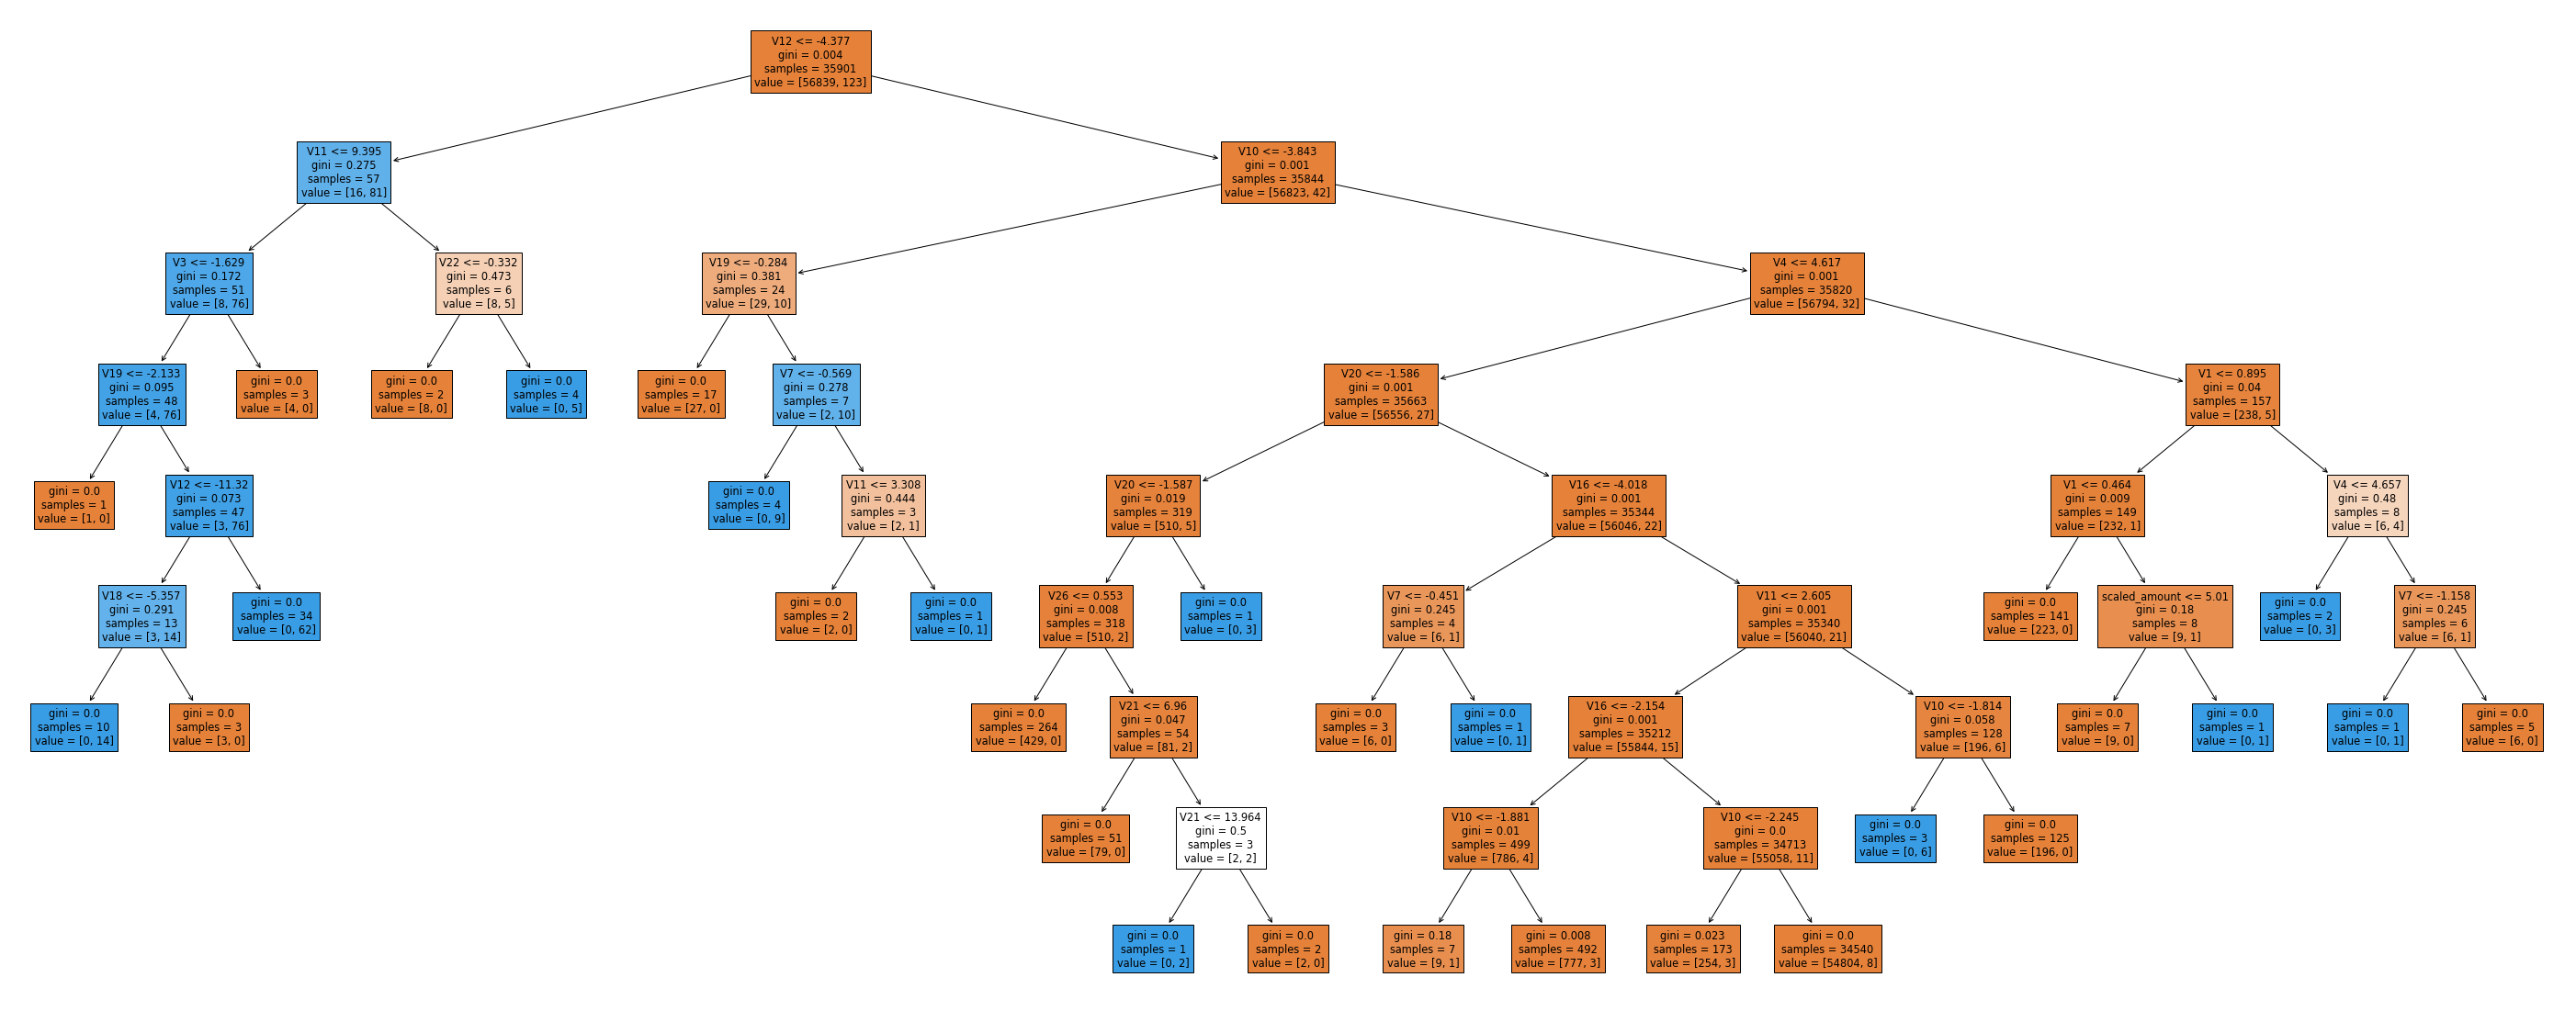

In [43]:
plt.figure(figsize=(50,20))
fig = tree.plot_tree(RandForestTest.estimators_[0], feature_names=test_features.columns, filled=True)